In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [59]:
df1 = pd.read_csv("ex1data1.txt", header=None)
df1.columns = ['population', 'profit']
df1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\roman\AppData\Local\Temp\ipykernel_20224\2020236700.py:3: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Profit, $10^{4}$\$")


Text(0, 0.5, 'Profit, $10^{4}$\\$')

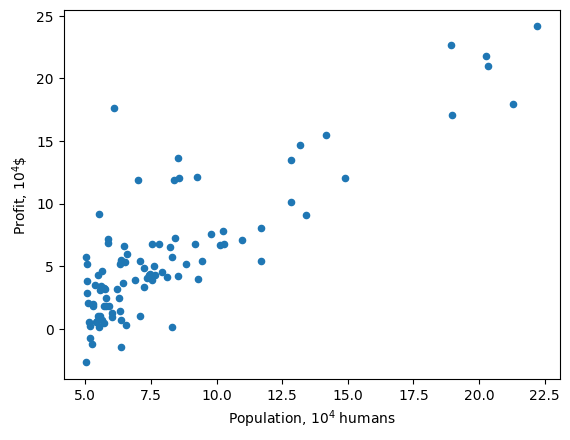

In [60]:
plt.scatter(df1['population'], df1['profit'], s=20)
plt.xlabel("Population, $10^{4}$ humans")
plt.ylabel("Profit, $10^{4}$\$")

In [61]:
x = df1['population'].values
y = df1['profit'].values
theta = np.array([0., 0.])

def h(theta, x):
    return theta[1]*x + theta[0]

def normalize(A):
  std_fixed = np.zeros_like(np.std(A, axis=0))
  std_fixed[np.std(A, axis=0) == 0] = 1
  std_fixed += np.std(A, axis=0)
  return (A - np.mean(A, axis=0))/std_fixed

x = normalize(x)

def loss_func(theta, x, y):
    temp = 0
    for i in range(x.size):
        temp += (h(theta, x[i]) - y[i])**2
    return 1/(2*y.size) * temp

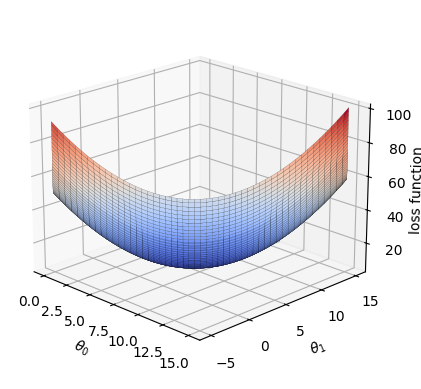

In [62]:
th_points = 200
th0 = np.linspace(0, 15, th_points)
th1 = np.linspace(-5, 15, th_points)
losses = np.zeros((th_points, th_points))
for i in range(th_points):
    for j in range(th_points):
        losses[i][j] = loss_func(np.array([th0[i], th1[j]]), x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(th0, th1, losses, cmap='coolwarm', linewidth=0.1, edgecolors='black')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("loss function")
ax.zaxis.labelpad=-0.7
ax.view_init(20, -45)

In [63]:
def grad_desc(loss_func, h, theta, x, y, a):
    loss_values = [loss_func(theta, x, y)]
    last_l = loss_func(theta, x, y) + 10
    while(np.abs(loss_func(theta, x, y) - last_l)>1e-5):
        last_l = loss_func(theta, x, y)
        loss_values.append(last_l)
        #print(last_l)
        temp0 = a/x.size * np.sum(h(theta, x) - y)
        temp1 = a/x.size * np.sum((h(theta, x) - y) * x)
        theta[0] = theta[0] - temp0
        theta[1] = theta[1] - temp1
    return theta, loss_values

Text(0, 0.5, 'loss function value')

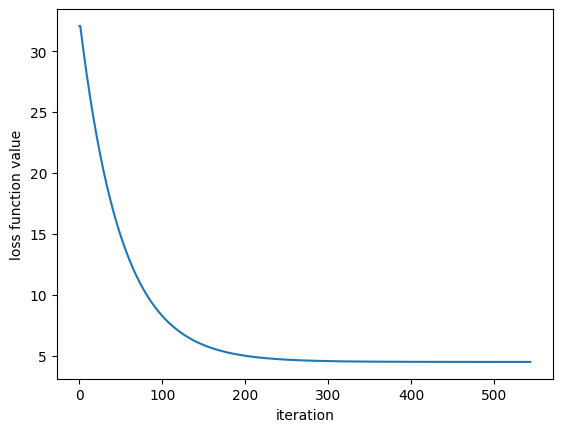

In [64]:
theta = [0., 0.]
theta, loss_values = grad_desc(loss_func, h, theta, x, y, 0.01)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel("iteration")
plt.ylabel("loss function value")

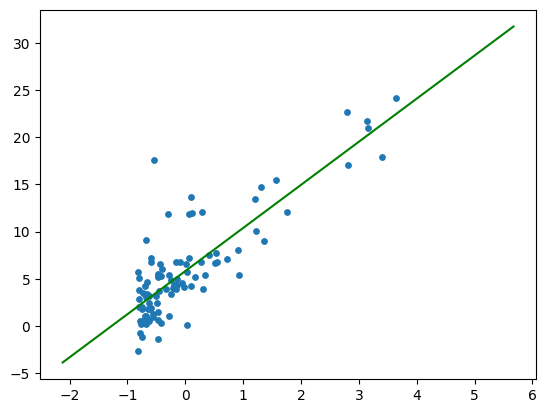

In [65]:
x_pred = (np.linspace(0, 30) - np.mean(df1['population'])) / np.std(df1['population'])
y_pred = h(theta, x_pred)
plt.plot(x_pred, y_pred, color='green')
plt.scatter(x, y, s=15)

In [66]:
x1 = (5 - np.mean(df1['population'])) / np.std(df1['population'])
x2 = (10 - np.mean(df1['population'])) / np.std(df1['population'])
print(f"Для города с населением {50} тысяч человек, прогнозируемая прибыль равна {h(theta, x1) : .0f}0k$")
print(f"Для города с населением {100} тысяч человек, прогнозируемая прибыль равна {h(theta, x2) : .0f}0k$")

Для города с населением 50 тысяч человек, прогнозируемая прибыль равна  20k$
Для города с населением 100 тысяч человек, прогнозируемая прибыль равна  80k$


In [69]:
x_matrix = np.zeros((x.size, 2))
x_matrix[:, 0] = 1
x_matrix[:, 1] = x

theta_normal_eq = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)
print("Coeffitients from normal equation",theta_normal_eq)
print("Coeffitients form gradient descent",theta)
print("Normal equation loss function",loss_func(theta_normal_eq, x, y))
print("Gradient descent loss function",loss_func(theta, x, y))

Coeffitients from normal equation [5.83913505 4.59304113]
Coeffitients form gradient descent [5.814480654766474, 4.573648079849165]
Normal equation loss function 4.476971375975179
Gradient descent loss function 4.477463340877763
